In [1]:
#pip install pyspark
#pip install setuptools
# pip install seaborn

In [2]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np



In [3]:
df_logs_5 = pd.read_parquet('logs_df_2024-08-05.parquet', engine='pyarrow')
df_logs_5.head(3)

,event_timestamp,user_id,region,city,video_id,watchtime
0,2024-08-05 12:12:32+03:00,bd1b6b07-e6a2-46ad-aa58-990bb7e89252,288eb079-1c29-4749-ab7e-550451a4d765,da903ff0-9eb8-4e91-b25d-22c70f962ca2,0af133e1-4fbf-4e10-b9e8-19fbe1a011c3,32
1,2024-08-05 18:30:15+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,340
2,2024-08-05 12:35:16+03:00,5c94a654-f376-4529-b463-b62b6b50e8ca,2c1f4ce4-66e0-4481-a0ed-244bf76fa83a,93a12888-fdf4-4889-a1ef-3ef0537d674d,8b106b84-f3f5-4c27-820c-7e1546b43614,12


In [26]:
# Преобразуем event_timestamp в datetime
df_logs_5['event_timestamp'] = pd.to_datetime(df_logs_5['event_timestamp'])

# Округляем время до ближайшего часа
df_logs_5['rounded_hour'] = df_logs_5['event_timestamp'].apply(
    lambda x: (x + pd.Timedelta(minutes=30)).replace(minute=0, second=0, microsecond=0)
)

# Фильтруем данные по региону с максимальным количеством просмотров
region_views = df_logs_5.groupby('region').size().reset_index(name='view_count')
max_region = region_views.loc[region_views['view_count'].idxmax()]['region']
df_region = df_logs_5[df_logs_5['region'] == max_region]

# Группируем по округленному часу и считаем количество просмотров
hourly_views = df_region.groupby('rounded_hour').size().reset_index(name='view_count')

# Строим график распределения просмотров по часам
plt.figure(figsize=(10,6))
plt.plot(hourly_views['rounded_hour'], hourly_views['view_count'], marker='o')
plt.xlabel('Час')
plt.ylabel('Количество просмотров')
plt.title(f'Распределение просмотров по часам для региона: {max_region}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
df_video = pd.read_parquet('data/video_stat.parquet', engine= 'pyarrow')
df_video

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,973f24c0-15b2-434f-8740-4e2726f79c30,2024-06-15 22:58:03+03:00,0,556,2,0,0,0,0,7.733,...,1.656386,1.616750,0,0,0,1,пережила свой яд,,Мультфильмы,79276150-fdaf-4626-9452-6f1ad975741d
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,2021-04-18 17:27:42+03:00,0,109,2,1,0,0,0,379.000,...,5.570802,5.649635,0,0,0,1,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...","🎓Знаете ли Вы, что ? Интересные факты ! # 2🎓...",Развлечения,16278647-5912-48af-a071-582dcfd0e354
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,2022-11-17 16:36:43+03:00,0,163,2,2,0,0,0,1020.767,...,0.342614,0.285310,0,0,0,1,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",Шляпа связана из пряжи NAKO Sport Wool в 100гр...,Хобби,9afa94aa-c2a6-43fc-a0d1-175eaf7fa194
3,154fac0e-1794-4406-afa0-61f688e3a764,2010-01-01 00:00:01+03:00,0,10657,5227,1300,202,24,0,42.025,...,0.418336,0.513562,186,1162,4550,1,найк,найк дрессура,Животные,4af9b043-40f4-4288-85c6-192612dca35b
4,470b4e3e-e06d-4370-80dc-34d6a78b22db,2023-11-29 16:49:46+03:00,0,154,45,13,1,0,0,695.647,...,9.310358,9.290497,0,8,18,1,SHACMAN. Шакман замена двухрядного подшипника ...,,Разное,841e6bd8-0015-4502-a3e9-aaa07112a585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936081,6e3067be-8602-4889-b296-3dbba9e29a14,2023-07-22 17:48:30+03:00,0,705,39,23,7,0,0,92.996,...,10.705581,12.762620,0,5,5,1,Сергий против нечисти сериал / сергий против н...,сергий против нечисти смотреть\t сергий против...,Сериалы,3d4ea198-d327-4e21-af62-3e93fcd69e08
1936082,542bb668-c8ec-4047-80c6-d98b39d3b7ce,2010-06-17 18:38:04+03:00,0,109,2,0,0,0,0,65.280,...,1.446613,1.454383,0,0,2,1,Greece 2-1 Nigeria,,Спорт,69573325-e993-43f4-accd-1ddb5252859d
1936083,eeeb7b1e-6e46-4633-a9fb-3782256857f5,2022-11-06 09:24:55+03:00,0,162,20,4,2,0,0,94.134,...,8.950831,9.297989,0,0,9,1,Сказочный патруль когда выйдут 76-77 серии тео...,,Лайфстайл,307f2310-337d-4065-990d-37635286908f
1936084,7ef043b7-a34c-40c7-865e-1b251b00df72,2023-11-17 01:35:34+03:00,0,144,22,9,2,0,0,321.829,...,5.489105,3.679740,0,2,8,1,Гайд на 120 фпс // Разблокировка Фпс после 9.2...,#120fps #120fps_blitz 0:19 Предыстория 1:27 За...,Разное,f8daacc1-aa63-4721-94b8-153a6913df37


In [14]:
from datetime import datetime
import pytz

# Создаем объект timezone с часовым поясом +3
tz = pytz.timezone('Etc/GMT-3')

# Получаем текущую дату и время в часовом поясе +3
current_date = datetime.now(tz)

# Вычисляем количество дней с момента публикации видео
df_video["days_since_pub"] = (
    current_date - pd.to_datetime(df_video["v_pub_datetime"], unit='s')
).dt.days

# Вычисляем отношение количества комментариев к количеству дней с момента публикации
df_video["cmments_per_day"] = (
    df_video["v_total_comments"] / df_video["days_since_pub"]
)
df_video.to_parquet('data/video_stat.parquet')

In [5]:
df_video['category_id'].unique()


array(['Мультфильмы', 'Развлечения', 'Хобби', 'Животные', 'Разное',
       'Лайфстайл', 'Телепередачи', 'Спорт', 'Недвижимость', 'Сериалы',
       'Детям', 'Музыка', 'Юмор', 'Авто-мото', 'Сад и огород', 'Фильмы',
       'Видеоигры', 'Наука', 'Путешествия', 'Технологии и интернет',
       'Лайфхаки', 'Культура', 'Обзоры и распаковки товаров', 'Обучение',
       'Здоровье', 'Охота и рыбалка', 'Строительство и ремонт', 'Аниме',
       'Эзотерика', 'Еда', 'UNKNOWN', 'Интервью',
       'Бизнес и предпринимательство', 'Техника и оборудование',
       'Психология', 'Красота', 'Природа', 'Дизайн', 'Аудиокниги',
       'Аудио'], dtype=object)

In [6]:
# Шаг 2. Объединение данных по video_id
df_merged = pd.merge(df_logs_5[['video_id', 'region', 'watchtime']], 
                     df_video[['video_id', 'category_id']], 
                     on='video_id', 
                     how='inner')

# Шаг 3. Вычисление среднего watchtime для каждой категории по каждому региону
df_avg_watchtime = (df_merged.groupby(['region', 'category_id'], as_index=False)
                             .agg(avg_watchtime=('watchtime', 'mean')))

# Шаг 4. Определение топ-10 категорий по каждому региону
df_avg_watchtime['rank'] = df_avg_watchtime.groupby('region')['avg_watchtime'].rank(method='first', ascending=False)

# Фильтруем только топ-10 по каждому региону
df_top10 = df_avg_watchtime[df_avg_watchtime['rank'] <= 10]

# Вывод результатов
df_top10.sort_values(by=['region', 'rank'])

,region,category_id,avg_watchtime,rank
1,00158539-b113-474b-8635-ad8900982ef6,Разное,193.000000,1.0
0,00158539-b113-474b-8635-ad8900982ef6,Лайфстайл,32.000000,2.0
2,0021e884-62ab-44c6-b8f5-e5814ef9199b,Телепередачи,2082.000000,1.0
36,004bad7f-04d4-42f0-a128-49cd8ac88f60,Телепередачи,1745.973660,1.0
39,004bad7f-04d4-42f0-a128-49cd8ac88f60,Фильмы,1688.694701,2.0
...,...,...,...,...
24179,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Интервью,15.000000,4.0
24181,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Обучение,10.000000,5.0
24182,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Развлечения,2.000000,6.0
24180,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Лайфстайл,0.000000,7.0


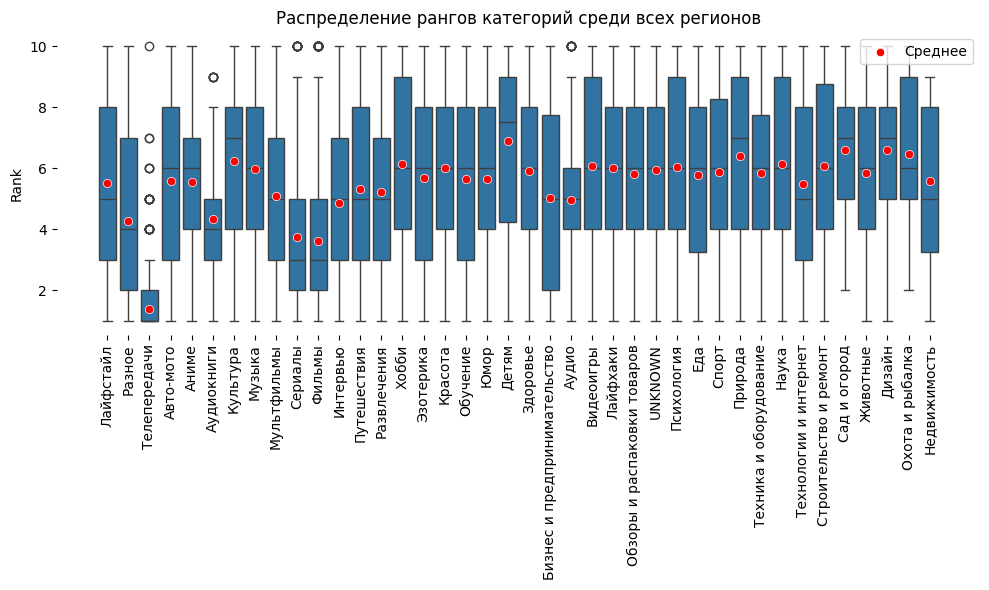

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Найдём средний ранг для каждой категории
df_avg_rank = df_avg_watchtime.groupby('category_id').agg(avg_rank=('rank', 'mean')).reset_index()

# Шаг 2: Создание боксплота для рангов категорий по регионам
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top10, x='category_id', y='rank')

# Отметим средний ранг каждой категории на боксплоте
sns.scatterplot(data=df_avg_rank, x='category_id', y='avg_rank', color='red', label='Среднее', zorder=5)

plt.title('Распределение рангов категорий среди всех регионов')
plt.xlabel('')
plt.ylabel('Rank')
plt.xticks(rotation=90)
sns.despine(top=True, right=True, bottom = True, left= True)

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [9]:
df_avg_rank.sort_values(by ='avg_rank')

,category_id,avg_rank
33,Телепередачи,1.373681
36,Фильмы,3.620448
30,Сериалы,3.754342
28,Разное,4.264813
4,Аудиокниги,4.326203
12,Интервью,4.873267
3,Аудио,4.953757
5,Бизнес и предпринимательство,5.023810
18,Мультфильмы,5.081585
27,Развлечения,5.222400
